In [61]:
import pandas as pd
import time
import numpy as np
import seaborn as sns

In [2]:
gdp = pd.read_csv("GDP.csv")
gdi = pd.read_csv("GDI.csv")

In [6]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
298,2021-07-01,23550.420
299,2021-10-01,24349.121
300,2022-01-01,24740.480
301,2022-04-01,25248.476


In [4]:
gdi

,DATE,GDI
0,1947-01-01,240.092
1,1947-04-01,243.209
2,1947-07-01,247.579
3,1947-10-01,256.122
4,1948-01-01,265.072
...,...,...
297,2021-04-01,23071.192
298,2021-07-01,23683.944
299,2021-10-01,24473.326
300,2022-01-01,25017.498


In [18]:
gdp["datetime"] = pd.to_datetime(gdp["DATE"])
gdp["year"] = pd.DatetimeIndex(gdp["datetime"]).year
gdp["quarter"] = pd.DatetimeIndex(gdp["datetime"]).quarter

gdi["datetime"] = pd.to_datetime(gdi["DATE"])
gdi["year"] = pd.DatetimeIndex(gdi["datetime"]).year
gdi["quarter"] = pd.DatetimeIndex(gdi["datetime"]).quarter

,DATE,GDI,datetime,year,quarter
0,1947-01-01,240.092,1947-01-01,1947,1
1,1947-04-01,243.209,1947-04-01,1947,2
2,1947-07-01,247.579,1947-07-01,1947,3
3,1947-10-01,256.122,1947-10-01,1947,4
4,1948-01-01,265.072,1948-01-01,1948,1
...,...,...,...,...,...
297,2021-04-01,23071.192,2021-04-01,2021,2
298,2021-07-01,23683.944,2021-07-01,2021,3
299,2021-10-01,24473.326,2021-10-01,2021,4
300,2022-01-01,25017.498,2022-01-01,2022,1


In [39]:
gdp_annual = gdp.groupby(["year"]).sum()
gdp_annual.drop(["quarter"], axis=1, inplace=True)

gdp_annual["GDI"] = gdi.groupby(["year"]).sum()["GDI"]
gdp_annual["ratio"] = gdp_annual["GDI"]/gdp_annual["GDP"]
gdp_annual["ratio"]

year
1947    0.988522
1948    1.000927
1949    0.993613
1950    0.995788
1951    0.990074
          ...   
2018    1.005552
2019    1.004935
2020    1.010205
2021    1.005530
2022    0.668705
Name: ratio, Length: 76, dtype: float64

In [51]:
gdp["gdi"] = gdi["GDI"]
gdp["annual_gdp"] = gdp.groupby(["year"])["GDP"].transform(np.sum)
gdp["annual_gdi"] = gdp.groupby(["year"])["gdi"].transform(np.sum)
gdp["ratio"] = gdp["annual_gdi"]/gdp["annual_gdp"]
gdp

,DATE,GDP,datetime,year,quarter,ratio,gdi,annual_gdp,annual_gdi
0,1947-01-01,243.164,1947-01-01,1947,1,0.988522,240.092,998.462,987.002
1,1947-04-01,245.968,1947-04-01,1947,2,0.988522,243.209,998.462,987.002
2,1947-07-01,249.585,1947-07-01,1947,3,0.988522,247.579,998.462,987.002
3,1947-10-01,259.745,1947-10-01,1947,4,0.988522,256.122,998.462,987.002
4,1948-01-01,265.742,1948-01-01,1948,1,1.000927,265.072,1097.871,1098.889
...,...,...,...,...,...,...,...,...,...
298,2021-07-01,23550.420,2021-07-01,2021,3,1.005530,23683.944,93260.325,93776.094
299,2021-10-01,24349.121,2021-10-01,2021,4,1.005530,24473.326,93260.325,93776.094
300,2022-01-01,24740.480,2022-01-01,2022,1,0.668705,25017.498,75652.245,50589.051
301,2022-04-01,25248.476,2022-04-01,2022,2,0.668705,25571.553,75652.245,50589.051


In [53]:
gdp["estimated_gdp"] = gdp["gdi"] * (1/gdp["ratio"])
gdp

,DATE,GDP,datetime,year,quarter,ratio,gdi,annual_gdp,annual_gdi,estimated_gdp
0,1947-01-01,243.164,1947-01-01,1947,1,0.988522,240.092,998.462,987.002,242.879689
1,1947-04-01,245.968,1947-04-01,1947,2,0.988522,243.209,998.462,987.002,246.032880
2,1947-07-01,249.585,1947-07-01,1947,3,0.988522,247.579,998.462,987.002,250.453620
3,1947-10-01,259.745,1947-10-01,1947,4,0.988522,256.122,998.462,987.002,259.095812
4,1948-01-01,265.742,1948-01-01,1948,1,1.000927,265.072,1097.871,1098.889,264.826440
...,...,...,...,...,...,...,...,...,...,...
298,2021-07-01,23550.420,2021-07-01,2021,3,1.005530,23683.944,93260.325,93776.094,23553.682186
299,2021-10-01,24349.121,2021-10-01,2021,4,1.005530,24473.326,93260.325,93776.094,24338.722581
300,2022-01-01,24740.480,2022-01-01,2022,1,0.668705,25017.498,75652.245,50589.051,37411.848030
301,2022-04-01,25248.476,2022-04-01,2022,2,0.668705,25571.553,75652.245,50589.051,38240.396970


<AxesSubplot: xlabel='Count', ylabel='percent_ratio'>

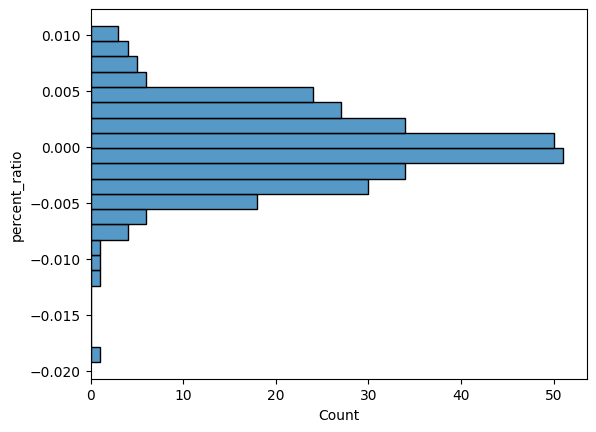

In [65]:
gdp["error"] = gdp["estimated_gdp"] - gdp["GDP"]
gdp = gdp[gdp["year"] < 2022]
gdp["percent_ratio"] = gdp["error"]/gdp["GDP"]
sns.histplot(gdp, y="percent_ratio")